## **WORKSHOP 002 - NOTEBOOK #2: Spotify - Exploratory Data Analysis (EDA)**

Developed by [Sebastian Belalcazar](https://github.com/SEBASBELMOS)

### **Setting Environment**

In [1]:
import os 
print(os.getcwd())

try:
    os.chdir("../../workshop-002")

except FileNotFoundError:
    print("""
        FileNotFoundError - The directory may not exist or you might not be in the specified path.
        If this has already worked, do not run this block again, as the current directory is already set to project_etl.
        """)
    
print(os.getcwd())

d:\U\FIFTH SEMESTER\ETL\workshop-002\notebooks
d:\U\FIFTH SEMESTER\ETL\workshop-002


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
plt.style.use("ggplot")

### **Read data**

In [3]:
spotify_data = pd.read_csv("data/spotify_dataset.csv")
spotify_data.head()


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [4]:
df = spotify_data.drop(columns=["Unnamed: 0"])


### **Data Preprocessing and Cleansing**

The Spotify dataset contains a total of 114,000 entries with 20 columns. 

**String columns (object type):**

- `track_id`: Unique identifier for each track.

- `artists`: Names of the artists performing the track.

- `album_name`: The name of the album where the track is featured.

- `track_name`: The name of the track.

- `track_genre`: The genre of the track.

**Numerical columns (int64 type):**

- `popularity`: Popularity score of the track.

- `duration_ms`: Duration of the track in milliseconds.

- `key`: Musical key (represented numerically).

- `mode`: Mode of the track (major or minor).

- `time_signature`: Time signature of the track (e.g., 4/4).

**Boolean column (bool type):**

- `explicit`: Indicates if the track contains explicit content.

**Decimal columns (float64 type):**

- `danceability`: Represents how suitable the track is for dancing.

- `energy`: Energy level of the track, indicating its intensity and activity.

- `loudness`: General volume of the track (in decibels).

- `speechiness`: Measures the presence of spoken words in the track.

- `acousticness`: The likelihood that the track is acoustic.

- `instrumentalness`: Represents how instrumental the track is (with few or no vocals).

- `liveness`: Indicates the presence of an audience (if it is live).

- `valence`: Positivity or happiness of the track.

- `tempo`: The tempo of the track (in beats per minute).

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

#### **Null Values**

In [6]:
df.isnull().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [7]:
df[df['artists'].isnull()]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [8]:
df = df.dropna().reset_index(drop=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113999 entries, 0 to 113998
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113999 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        113999 non-null  int64  
 5   duration_ms       113999 non-null  int64  
 6   explicit          113999 non-null  bool   
 7   danceability      113999 non-null  float64
 8   energy            113999 non-null  float64
 9   key               113999 non-null  int64  
 10  loudness          113999 non-null  float64
 11  mode              113999 non-null  int64  
 12  speechiness       113999 non-null  float64
 13  acousticness      113999 non-null  float64
 14  instrumentalness  113999 non-null  float64
 15  liveness          113999 non-null  float64
 16  valence           11

In [10]:
df.isnull().sum()

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

#### **Duplicated Values**

In [11]:
duplicated_values = df.duplicated()
duplicated_values.sum()

np.int64(450)

In [12]:
df.loc[duplicated_values].head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
1925,0CDucx9lKxuCZplLXUz0iX,Buena Onda Reggae Club,Disco 2,Song for Rollins,16,219346,False,0.841,0.577,0,-7.544,1,0.0438,0.238000,0.860000,0.0571,0.843,90.522,4,afrobeat
2155,2aibwv5hGXSgw7Yru8IYTO,Red Hot Chili Peppers,Stadium Arcadium,Snow (Hey Oh),80,334666,False,0.427,0.900,11,-3.674,1,0.0499,0.116000,0.000017,0.1190,0.599,104.655,4,alt-rock
3738,7mULVp0DJrI2Nd6GesLvxn,Joy Division,Timeless Rock Hits,Love Will Tear Us Apart,0,204621,False,0.524,0.902,2,-8.662,1,0.0368,0.000989,0.695000,0.1370,0.907,146.833,4,alternative
4648,6d3RIvHfVkoOtW1WHXmbX3,Little Symphony,Serenity,Margot,27,45714,False,0.269,0.142,0,-23.695,1,0.0509,0.866000,0.904000,0.1140,0.321,67.872,3,ambient
5769,481beimUiUnMUzSbOAFcUT,SUPER BEAVER,突破口 / 自慢になりたい,突破口,54,255080,False,0.472,0.994,8,-1.786,1,0.1140,0.025900,0.000000,0.0535,0.262,103.512,4,anime


In [13]:
df = df.drop_duplicates()
print(f"After dropping duplicates: {df.shape[0]} rows")


After dropping duplicates: 113549 rows


In [14]:
df[df.duplicated(subset=["track_id"])].head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
3000,5E30LdtzQTGqRvNd7l6kG5,The Neighbourhood,Wiped Out!,Daddy Issues,87,260173,False,0.588,0.521,10,-9.461,1,0.0329,0.06780,0.149000,0.1230,0.337,85.012,4,alternative
3002,2K7xn816oNHJZ0aVqdQsha,The Neighbourhood,Hard To Imagine The Neighbourhood Ever Changing,Softcore,86,206280,False,0.575,0.568,9,-5.509,0,0.0300,0.04840,0.000417,0.2860,0.370,93.986,4,alternative
3003,2QjOHCTQ1Jl3zawyYOpxh6,The Neighbourhood,I Love You.,Sweater Weather,93,240400,False,0.612,0.807,10,-2.810,1,0.0336,0.04950,0.017700,0.1010,0.398,124.053,4,alternative
3011,6rrKbzJGGDlSZgLphopS49,The Score,ATLAS,Unstoppable,73,192106,False,0.485,0.843,1,-3.993,0,0.0467,0.00129,0.000010,0.1400,0.602,78.001,4,alternative
3012,0AUyNF6iFxMNQsNx2nhtrw,grandson,Blood // Water,Blood // Water,75,216720,False,0.510,0.882,8,-5.659,0,0.1590,0.00158,0.002060,0.0764,0.653,154.029,4,alternative


In [15]:
df = df.drop_duplicates(subset=["track_id"]).reset_index(drop=True)

In [16]:
df.shape

(89740, 20)

In [17]:
song_artist_group = df.groupby(["track_name", "artists"])

group_count = song_artist_group.size().reset_index(name="group_count").sort_values(by="group_count", ascending=False)

#### **Repeated songs & group genres**

In [18]:
repeated_songs = group_count[group_count["group_count"] > 1]
repeated_songs.head()


,track_name,artists,group_count
55084,Rockin' Around The Christmas Tree,Brenda Lee,45
37981,Little Saint Nick - 1991 Remix,The Beach Boys,41
55570,Run Rudolph Run,Chuck Berry,40
23998,Frosty The Snowman,Ella Fitzgerald,34
37090,Let It Snow! Let It Snow! Let It Snow!,Dean Martin,32


In [19]:
repeated_songs.shape


(4657, 3)

In [20]:
repeated_songs_data = df

In [21]:
repeated_songs_data.shape

(89740, 20)

In [22]:
repeated_songs_data['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [23]:
genre_mapping = {
    'Rock/Metal': [
        'alt-rock', 'alternative', 'black-metal', 'death-metal', 'emo', 'grindcore',
        'hard-rock', 'hardcore', 'heavy-metal', 'metal', 'metalcore', 'psych-rock',
        'punk-rock', 'punk', 'rock-n-roll', 'rock', 'grunge', 'j-rock', 'goth',
        'industrial', 'rockabilly', 'indie'
    ],
    
    'Pop': [
        'pop', 'indie-pop', 'power-pop', 'k-pop', 'j-pop', 'mandopop', 'cantopop',
        'pop-film', 'j-idol', 'synth-pop'
    ],
    
    'Electronic/Dance': [
        'edm', 'electro', 'electronic', 'house', 'deep-house', 'progressive-house',
        'techno', 'trance', 'dubstep', 'drum-and-bass', 'dub', 'garage', 'idm',
        'club', 'dance', 'minimal-techno', 'detroit-techno', 'chicago-house',
        'breakbeat', 'hardstyle', 'j-dance', 'trip-hop'
    ],
    
    'Urban': [
        'hip-hop', 'r-n-b', 'dancehall', 'reggaeton', 'reggae'
    ],
    
    'Latino': [
        'brazil', 'salsa', 'samba', 'spanish', 'pagode', 'sertanejo',
        'mpb', 'latin', 'latino'
    ],
    
    'Global Sounds': [
        'indian', 'iranian', 'malay', 'turkish', 'tango', 'afrobeat', 'french', 'german', 'british', 'swedish'
    ],
    
    'Jazz and Soul': [
        'blues', 'bluegrass', 'funk', 'gospel', 'jazz', 'soul', 'groove', 'disco', 'ska'
    ],
    
    'Varied Themes': [
        'children', 'disney', 'forro', 'kids', 'party', 'romance', 'show-tunes',
        'comedy', 'anime'
    ],
    
    'Instrumental': [
        'acoustic', 'classical',  'guitar', 'piano',
        'world-music', 'opera', 'new-age'
    ],
    
    'Mood': [
        'ambient', 'chill', 'happy', 'sad', 'sleep', 'study'
    ],
    
    'Single Genre': [
        'country', 'honky-tonk', 'folk', 'singer-songwriter'
    ]
}


In [24]:
genre_cat_mapping = {genre: category for category, genres in genre_mapping.items() for genre in genres}

repeated_songs_data['track_genre'] = repeated_songs_data['track_genre'].map(genre_cat_mapping)

In [25]:
repeated_songs_data['track_genre'].unique()

array(['Instrumental', 'Global Sounds', 'Rock/Metal', 'Mood',
       'Varied Themes', 'Jazz and Soul', 'Latino', 'Electronic/Dance',
       'Pop', 'Single Genre', 'Urban'], dtype=object)

In [26]:
subset_cols = [col for col in repeated_songs_data.columns if col not in ['track_name', 'artists', 'track_genre']]

repeated_songs_data = repeated_songs_data.drop_duplicates(subset=subset_cols, keep="first")

repeated_songs_data.shape

(89740, 20)

In [27]:
song_artist_group = repeated_songs_data.groupby(['track_name', 'artists'])
song_artist_group


group_count = (song_artist_group.size().reset_index(name='count').sort_values(by='count', ascending=False))

In [28]:
repeated_songs = group_count.query('count > 1')
repeated_songs.head()

,track_name,artists,count
55084,Rockin' Around The Christmas Tree,Brenda Lee,45
37981,Little Saint Nick - 1991 Remix,The Beach Boys,41
55570,Run Rudolph Run,Chuck Berry,40
23998,Frosty The Snowman,Ella Fitzgerald,34
37090,Let It Snow! Let It Snow! Let It Snow!,Dean Martin,32


In [29]:
repeated_songs_data = (repeated_songs_data.sort_values(by='popularity', ascending=False).groupby(['track_name', 'artists']).head(1).sort_index().reset_index(drop=True))
repeated_songs_data.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,Instrumental
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,Instrumental
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,Instrumental
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,Instrumental
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,Instrumental


In [30]:
df = repeated_songs_data

In [31]:
df.shape

(81343, 20)

#### **Song Duration**

##### **Milliseconds to minutes**

In [32]:

df['duration_min'] = df['duration_ms'].apply(lambda x: round(x / 60000, 2))

df['duration_min'] = df['duration_min'].astype(int)


In [33]:
df[['duration_ms', 'duration_min']].head()

,duration_ms,duration_min
0,230666,3
1,149610,2
2,210826,3
3,201933,3
4,198853,3


##### **Song duration categorisation**

**Categories:**

`Short` (_Less than 2,5 minutes_) - `Average` (_Between 2,5 and 5 minutes_) - `Long` (_5 minutes and more_)

In [34]:
def categorise_duration(duration_ms):
    if duration_ms < 150000:
        return 'Short'
    elif duration_ms >= 150000 and duration_ms <= 300000:
        return 'Average'
    else:
        return 'Long'

df['duration_category'] = df['duration_ms'].apply(categorise_duration)
df[['duration_ms', 'duration_category']].head()


,duration_ms,duration_category
0,230666,Average
1,149610,Short
2,210826,Average
3,201933,Average
4,198853,Average


#### **Song popularity categorisation**

**Categories:**

`Low` (_Range from 0 - 30_) - `Medium` (_Range from 31 - 70_) - `High` (_Range from 71 - 100_)

In [35]:
def categorise_popularity(popularity):
    if popularity >= 0 and popularity <= 30:
        return 'Low'
    elif popularity >= 31 and popularity <= 70:
        return 'Medium'
    else:
        return 'High'
    
df['popularity_category'] = df['popularity'].apply(categorise_popularity)
df[['popularity', 'popularity_category']].head()


,popularity,popularity_category
0,73,High
1,55,Medium
2,57,Medium
3,71,High
4,82,High


#### **`track_mood` based on `valence` column**

**Categories:**

`Sad` (_Valence value from 0 to 0,3_) - `Neutral` (_Valence value from 0,31 to 0,6_) - `Happy` (_Valence value from 0,61 to 1,0_)

In [36]:
def categorise_mood(valence):
    if valence >= 0 and valence <= 0.3:
        return 'Sad'
    elif valence >= 0.31 and valence <= 0.6:
        return 'Neutral'
    else:
        return 'Happy'
    
df['track_mood'] = df['valence'].apply(categorise_mood)
df[['valence', 'track_mood']].head()


,valence,track_mood
0,0.715,Happy
1,0.267,Sad
2,0.120,Sad
3,0.143,Sad
4,0.167,Sad


#### **`live_performance` column**

In [37]:
df['live_performance'] = df['liveness'].apply(lambda x: 'Live' if x > 0.8 else 'Studio')

Text(0.5, 1.0, 'Live Performance Counts')

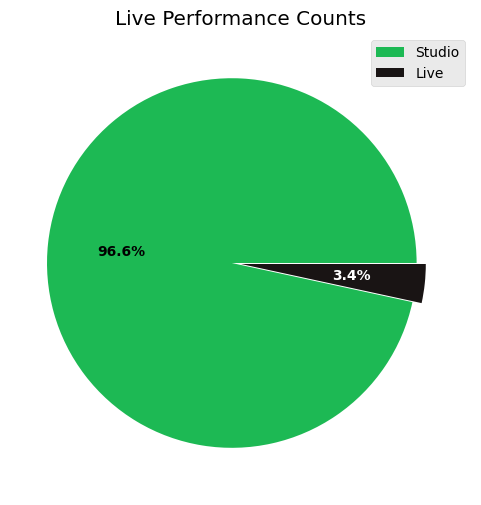

In [38]:
live_performance_counts = df['live_performance'].value_counts()
live_performance_counts

labels = live_performance_counts.index.tolist()

pie = live_performance_counts.plot(kind='pie', 
                             figsize=(6, 6), 
                             autopct="%1.1f%%", 
                             colors=['#1DB954', '#191414'], 
                             explode=[0.05, 0], 
                             textprops={'color': 'white', 'fontweight': 'bold'}, 
                             labeldistance=1.1, 
                             labels=None
                            )

plt.legend(labels=labels, loc='best')

texts = pie.texts

for i, text in enumerate(texts):
    if i < len(labels) and labels[i] == 'Live':
        text.set_color('black')

plt.ylabel('')

plt.title('Live Performance Counts')


#### **Drop `speechiness`, `acousticness`, and `instrumentalness` columns**

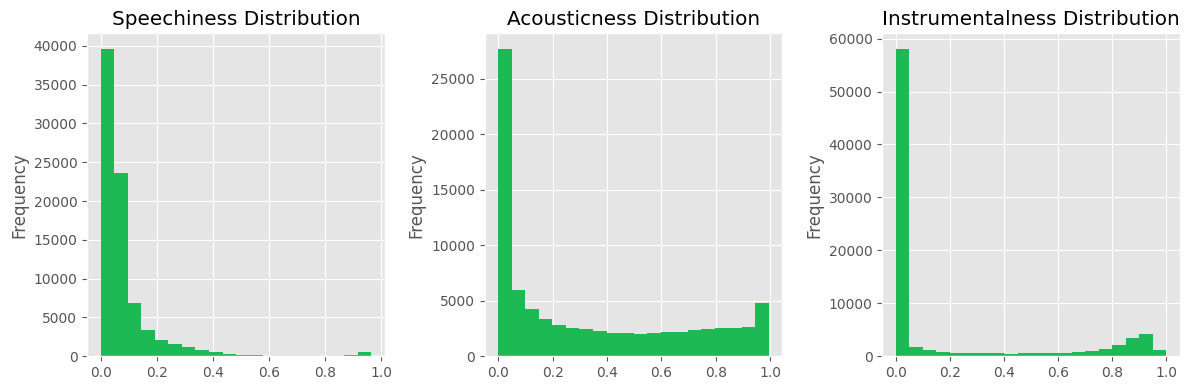

In [39]:
spotify_green = '#1DB954'
spotify_black = '#191414'

fig, ax = plt.subplots(1, 3, figsize=(12, 4))

df['speechiness'].plot(kind='hist', bins=20, ax=ax[0], color=spotify_green, title='Speechiness Distribution')

df['acousticness'].plot(kind='hist', bins=20, ax=ax[1], color=spotify_green, title='Acousticness Distribution')

df['instrumentalness'].plot(kind='hist', bins=20, ax=ax[2], color=spotify_green, title='Instrumentalness Distribution')

plt.tight_layout()
plt.show()


As seen in the three graphs, there is a greater concentration of values close to zero. This tendency in these columns means they are unlikely to hold any meaningful significance for our analysis.

In [40]:
def short_title(title, max_length=20):
    if len(title) <= max_length:
        return title
    else:
        return title[:max_length] + '...'

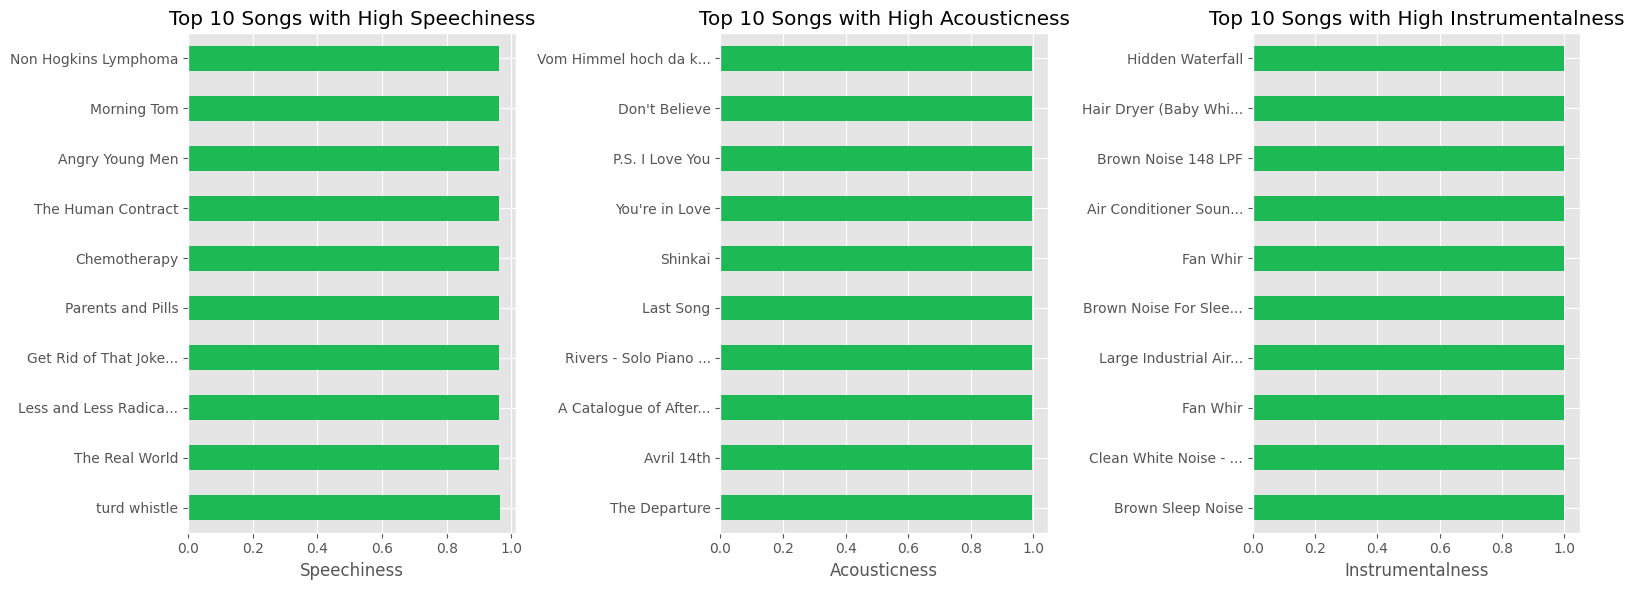

In [41]:
fig, ax = plt.subplots(1, 3, figsize=(16, 6))

top_10_speechiness = df.nlargest(10, 'speechiness')
top_10_speechiness['short_track_name'] = top_10_speechiness['track_name'].apply(short_title)
top_10_speechiness.plot(kind='barh', x='short_track_name', y='speechiness', ax=ax[0], color=spotify_green, title='Top 10 Songs with High Speechiness', legend=False)
ax[0].set_ylabel('')
ax[0].set_xlabel('Speechiness')

top_10_acousticness = df.nlargest(10, 'acousticness')
top_10_acousticness['short_track_name'] = top_10_acousticness['track_name'].apply(short_title)
top_10_acousticness.plot(kind='barh', x='short_track_name', y='acousticness', ax=ax[1], color=spotify_green, title='Top 10 Songs with High Acousticness', legend=False)
ax[1].set_ylabel('')
ax[1].set_xlabel('Acousticness')

top_10_instrumentalness = df.nlargest(10, 'instrumentalness')
top_10_instrumentalness['short_track_name'] = top_10_instrumentalness['track_name'].apply(short_title)
top_10_instrumentalness.plot(kind='barh', x='short_track_name', y='instrumentalness', ax=ax[2], color=spotify_green, title='Top 10 Songs with High Instrumentalness', legend=False)
ax[2].set_ylabel('')
ax[2].set_xlabel('Instrumentalness')

plt.tight_layout()
plt.show()


In [42]:
df = df.drop(columns=['speechiness', 'acousticness', 'instrumentalness'])

#### **Drop columns**

In [43]:
df = df.drop(columns=['mode', 'time_signature', 'key', 'tempo', 'duration_ms', 'valence', 'liveness'])

In [44]:
df.head()

,track_id,artists,album_name,track_name,popularity,explicit,danceability,energy,loudness,track_genre,duration_min,duration_category,popularity_category,track_mood,live_performance
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,False,0.676,0.4610,-6.746,Instrumental,3,Average,High,Happy,Studio
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,False,0.420,0.1660,-17.235,Instrumental,2,Short,Medium,Sad,Studio
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,False,0.438,0.3590,-9.734,Instrumental,3,Average,Medium,Sad,Studio
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,False,0.266,0.0596,-18.515,Instrumental,3,Average,High,Sad,Studio
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,False,0.618,0.4430,-9.681,Instrumental,3,Average,High,Sad,Studio


### **Data Comprehension**

#### **Popularity Distribution**

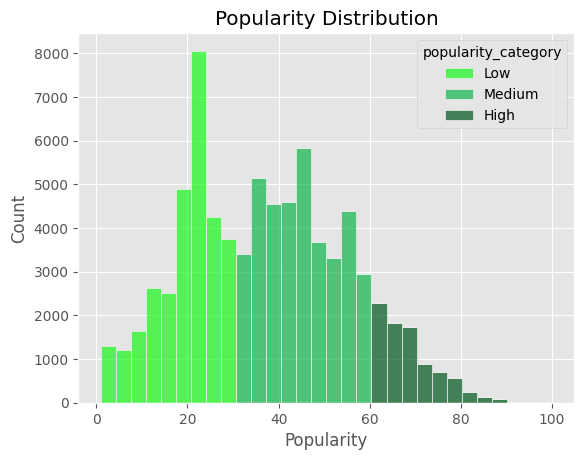

In [45]:
green_palette = ['#25F727', '#1DB954', '#0d5f29'] #Extracted from Adobe Color using as reference the Spotify green color

df['popularity_category'] = pd.cut(
    df['popularity'],
    bins=[0, 30, 60, 100],
    labels=['Low', 'Medium', 'High']
)

sns.histplot(
    data=df, 
    x='popularity', 
    hue='popularity_category',
    bins=30, 
    multiple='stack', 
    palette=green_palette,
    hue_order=['Low', 'Medium', 'High']
)

plt.title('Popularity Distribution')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()


#### **Top 10 Popular Songs**

In [46]:
popular_songs = (df.query('popularity_category == "High"').reset_index(drop=True).sort_values(by='popularity', ascending=False))

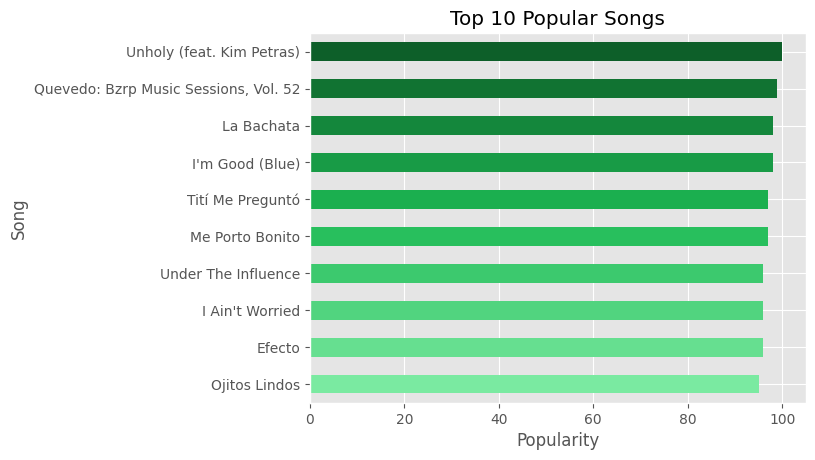

In [47]:
popular_songs_bar = (popular_songs.head(10).sort_values(by='popularity'))

spotify_green = '#1DB954' 
light_green = '#7AEAA1'    
dark_green = '#0d5f29'     

cmap = LinearSegmentedColormap.from_list('spotify_greens', [light_green, spotify_green, dark_green])

colours = cmap(np.linspace(0, 1, len(popular_songs_bar)))

ax = popular_songs_bar.plot(kind='barh', x='track_name', y='popularity', color=colours, title='Top 10 Popular Songs', legend=False)

plt.xlabel("Popularity")
plt.ylabel("Song")
plt.show()


#### **Song Danceability and Energy Distribution**

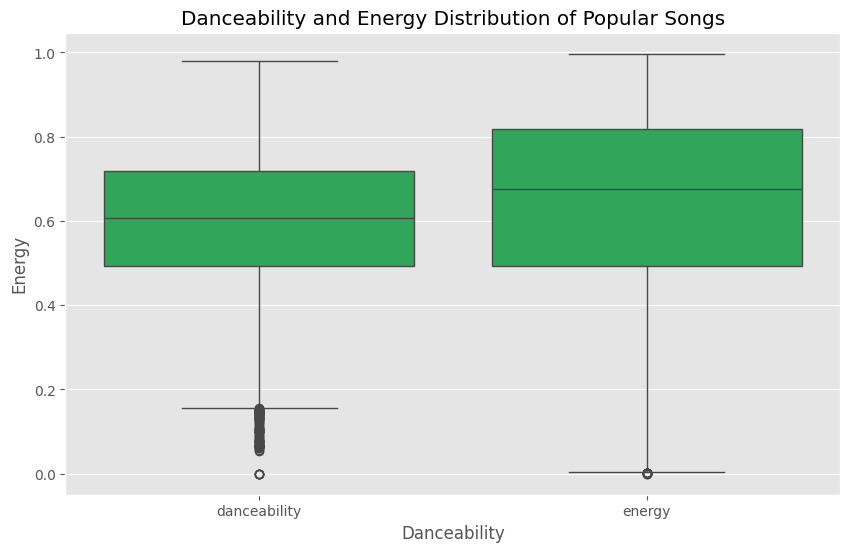

In [48]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=popular_songs[['danceability', 'energy']], color=spotify_green)

plt.title('Danceability and Energy Distribution of Popular Songs')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.show()


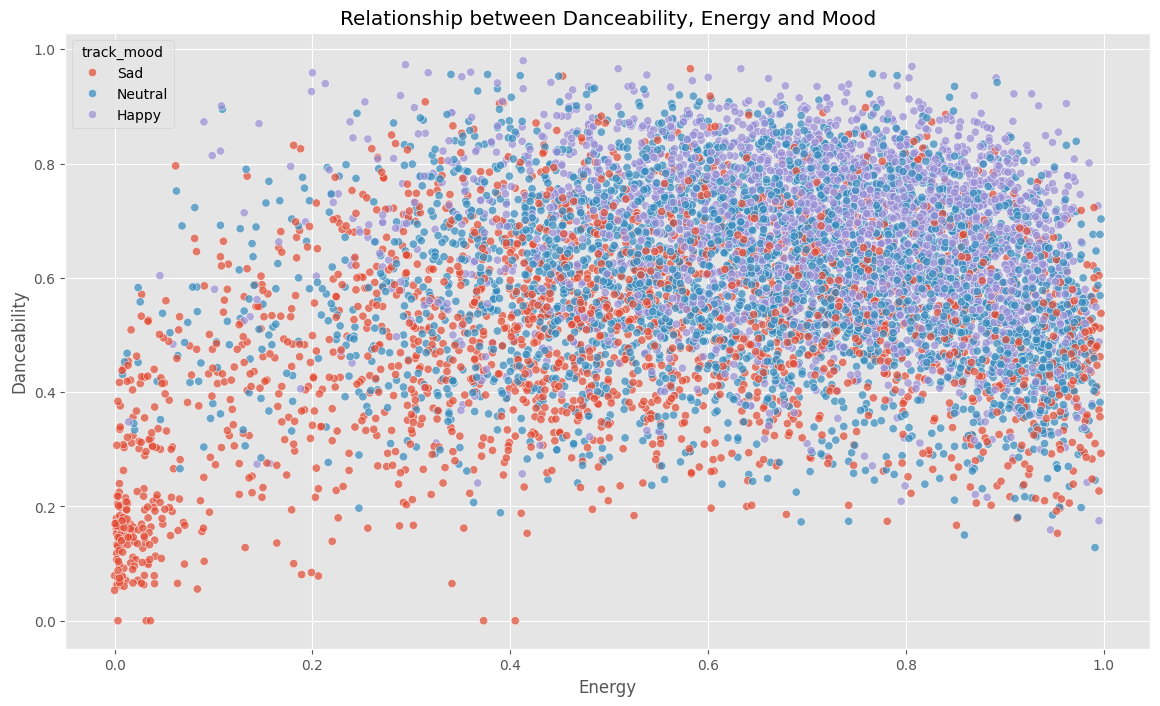

In [49]:
plt.figure(figsize=(14, 8))

sns.scatterplot(data=popular_songs, 
                x='energy', 
                y='danceability', 
                hue='track_mood', 
                alpha=0.7)

plt.title('Relationship between Danceability, Energy and Mood')
plt.xlabel('Energy')
plt.ylabel('Danceability')

plt.legend(title='track_mood')

plt.show()


#### **Song Duration Distribution**

In [50]:
df.head()

,track_id,artists,album_name,track_name,popularity,explicit,danceability,energy,loudness,track_genre,duration_min,duration_category,popularity_category,track_mood,live_performance
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,False,0.676,0.4610,-6.746,Instrumental,3,Average,High,Happy,Studio
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,False,0.420,0.1660,-17.235,Instrumental,2,Short,Medium,Sad,Studio
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,False,0.438,0.3590,-9.734,Instrumental,3,Average,Medium,Sad,Studio
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,False,0.266,0.0596,-18.515,Instrumental,3,Average,High,Sad,Studio
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,False,0.618,0.4430,-9.681,Instrumental,3,Average,High,Sad,Studio


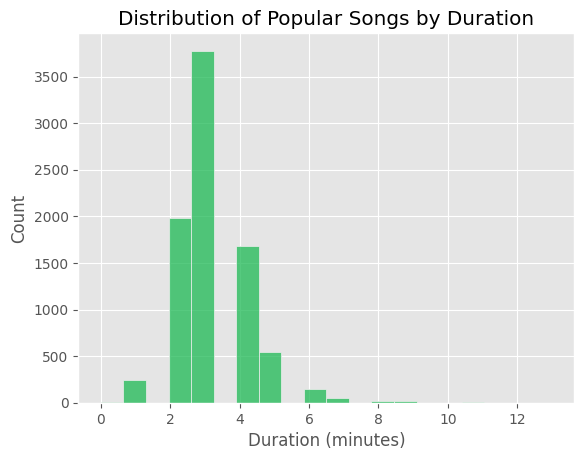

In [51]:
popular_duration_chart = popular_songs.sort_values(by='duration_min')

sns.histplot(
    data=popular_duration_chart,
    x='duration_min',
    bins=20,
    multiple='stack',
    color=spotify_green,
)

plt.title('Distribution of Popular Songs by Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()

#### **Explicit Songs**

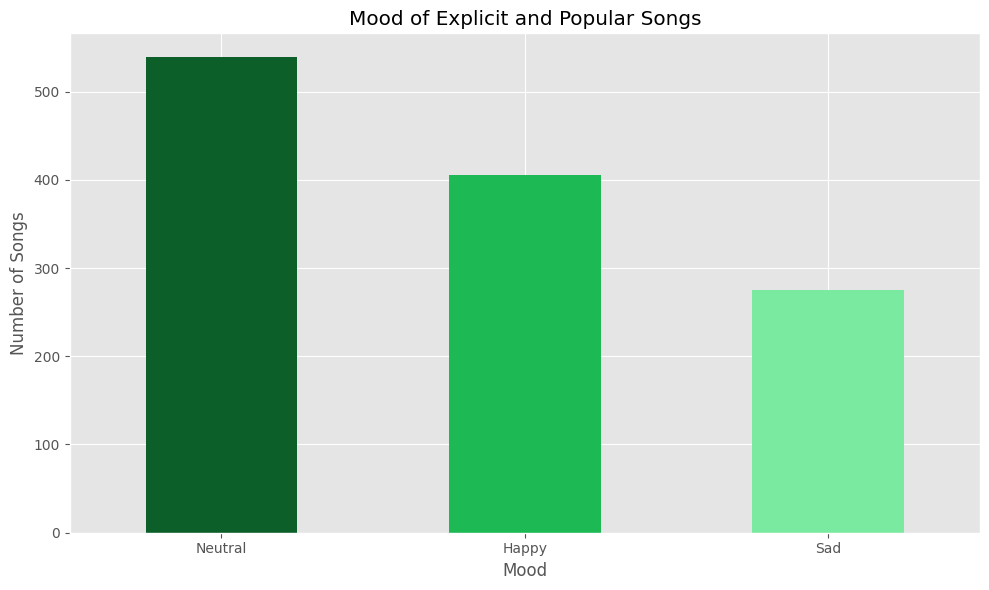

In [52]:
explicit_popular_songs = popular_songs[popular_songs["explicit"] == True]

mood_counts = explicit_popular_songs["track_mood"].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 6))

colours = cmap(np.linspace(1, 0, len(mood_counts)))

mood_counts.plot(kind="bar", color=colours)

plt.title("Mood of Explicit and Popular Songs")
plt.xlabel("Mood")
plt.ylabel("Number of Songs")
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

#### **Song Loudness Distribution**

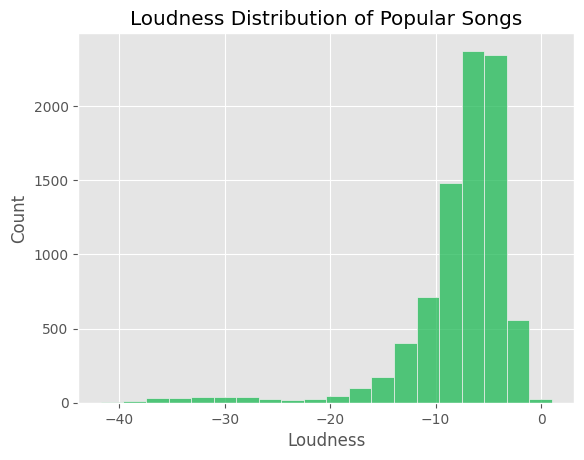

In [53]:
sns.histplot(data=popular_songs, x='loudness', bins=20, color=spotify_green, multiple='stack')
plt.title('Loudness Distribution of Popular Songs')
plt.xlabel('Loudness')
plt.ylabel('Count')
plt.show()

#### **Most Popular Genres**

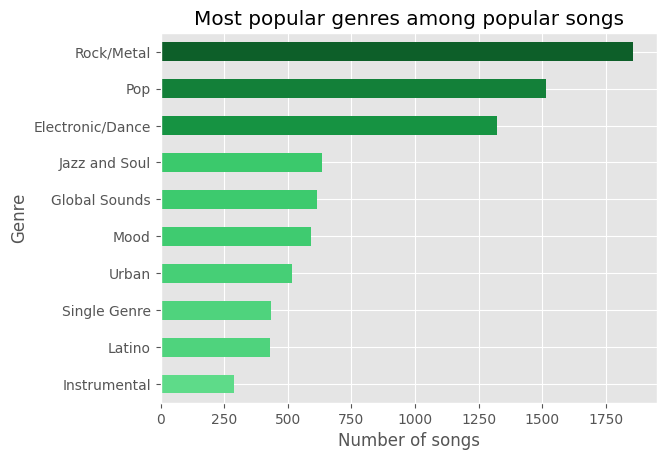

In [ ]:
popular_genres = popular_songs['track_genre'].value_counts()

top_genres = popular_genres.head(10).sort_values()

colour_intensities = [value/top_genres.max() for value in top_genres]
custom_colours = cmap(colour_intensities)

top_genres.plot(kind='barh', color=custom_colours, legend=False)

plt.title('Most popular genres among popular songs')
plt.xlabel('Number of songs')
plt.ylabel('Genre')

plt.show()

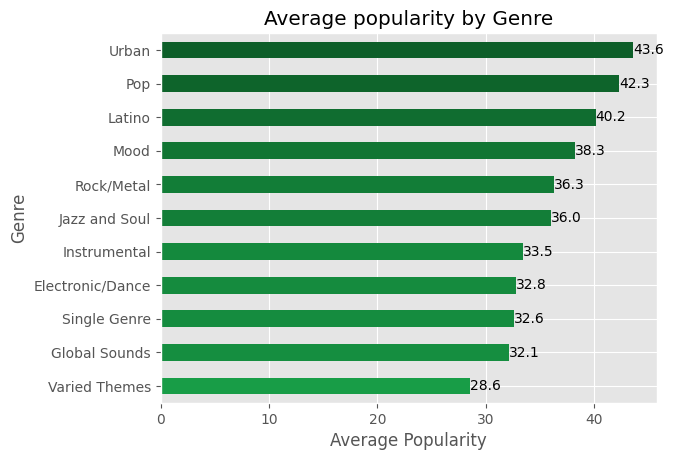

In [59]:
avg_popularity_by_genre = (df.groupby('track_genre')['popularity'].mean().reset_index().sort_values(by='popularity', ascending=True))

popularity_values = avg_popularity_by_genre['popularity']
color_intensities = [value/popularity_values.max() for value in popularity_values]
custom_colours = cmap(color_intensities)

ax = avg_popularity_by_genre.plot(kind='barh', x='track_genre', y='popularity', color=custom_colours, legend=False)

for i in ax.patches:
    ax.annotate(f'{i.get_width():.1f}', (i.get_width(), i.get_y() + i.get_height()/2), 
                ha='left', va='center')


plt.title("Average popularity by Genre")
plt.xlabel("Average Popularity")
plt.ylabel("Genre")

plt.show()

### **Key Insights and Conclusions**

The exploratory data analysis of the Spotify dataset provides several concise insights into the factors driving song popularity, based on data cleaning, transformation, and visualisations.

#### **Data Cleaning and Transformation**
1. **Column Removal**: I removed unnecessary columns like `Unnamed: 0`, `speechiness`, `acousticness`, `instrumentalness`, `mode`, `duration_ms`, `key`, `tempo`, `valence`, `liveness`, and `time_signature` to focus the analysis, as these had low variability or relevance.
2. **Duplicate Handling**: I eliminated duplicates, reducing the dataset from 113,999 to 81,343 rows, first by exact duplicates, then by `track_id`, and finally by keeping the most popular version of repeated songs.
3. **Missing Values**: I dropped rows with missing values in `artists`, `album_name`, and `track_name` (1 each), ensuring a clean dataset.
4. **Genre Consolidation**: I grouped 126 unique genres into 11 broader categories (e.g., `Rock/Metal`, `Pop`, `Urban`) for clearer analysis and better understanding.
5. **Data Enhancement**: I added features to enhance analysis:
   - `duration_min` for song length in minutes.
   - Duration categories (`Short`, `Average`, `Long`).
   - Popularity categories (`Low`, `Medium`, `High`).
   - `track_mood` (`Happy`, `Neutral`, `Sad`) from `valence`.
   - `live_performance` to distinguish studio vs. live recordings.

#### **Key Insights**

##### **Popularity Analysis**
1. **Volume and Popularity**: Popular songs typically have loudness levels between -10 dB and -2.5 dB, suggesting louder tracks attract more listeners.
2. **Optimal Duration**: Most popular songs last 2–4 minutes, indicating a listener preference for moderate length tracks.
3. **Audio Characteristics**: Popular songs show high variability in danceability and energy (medians around 0.65 and 0.7), with "Happy" songs often having higher values in both.
4. **Mood Correlation**: "Happy" songs (valence > 0.6) are more danceable and energetic, while "Sad" songs (valence ≤ 0.3) have lower values, reflecting their emotional tone.
5. **Popularity Distribution**: Popularity is right-skewed, with many songs in the low range (0–30), but a notable number achieve high popularity (71–100).
6. **Top Songs**: Tracks like "Unholy (feat. Kim Petras)" and "Quevedo: Bzrp Music Sessions, Vol. 52" lead with near-100 popularity scores, spanning `Pop` and `Urban` genres.

##### **Genre Analysis**
1. **Dominant Genres**: `Rock/Metal`, `Pop`, and `Electronic/Dance` are the most common among popular songs, each with over 1,000 tracks.
2. **Popularity by Genre**: `Urban` (43.6), `Pop` (42.3), and `Latino` (40.2) have the highest average popularity, showing quality over quantity compared to more frequent genres like `Rock/Metal`.
3. **Explicit Content and Mood**: Explicit popular songs are mostly "Neutral" or "Happy", suggesting listeners prefer positive or balanced emotions in such tracks.

##### **Live Performance Analysis**
1. **Studio Preference**: 96.6% of songs are studio recordings, with only 3.4% being live, indicating a strong listener preference for polished studio productions.

##### **Feature Distribution**
1. **Low Variability Features**: `Speechiness`, `acousticness`, and `instrumentalness` were heavily skewed towards zero, justifying their removal as they offered little insight into popularity.

#### **Visualisation Techniques**
1. **Distributions**: Histograms showed the spread of popularity, loudness, and removed features like `speechiness`.
2. **Relationships**: A scatter plot highlighted how danceability, energy, and mood interact, with "Happy" songs clustering at higher values.
3. **Comparisons**: Bar charts identified top songs, dominant genres, and average popularity by genre, while a pie chart showed the studio vs. live split.

#### **Business Implications**
1. **Playlist Curation**: Focus on high-energy, danceable songs in `Urban`, `Pop`, and `Latino` genres, with durations of 2–4 minutes, to boost engagement.
2. **Artist Guidance**: Artists should aim for loudness between -10 dB and -2.5 dB, moderate durations, and "Happy" or "Neutral" moods to increase popularity.
3. **Genre Targeting**: Marketing should prioritise `Urban`, `Pop`, and `Latino` genres, which have higher average popularity.
4. **Content Strategy**: Pair explicit content with "Happy" or "Neutral" moods to align with listener preferences.
5. **Production Focus**: Prioritise studio recordings over live performances to meet listener expectations.

#### **Conclusion**
This analysis of 81,343 Spotify songs reveals that popular tracks are typically studio-recorded, 2–4 minutes long, loud (-10 dB to -2.5 dB), and belong to `Urban`, `Pop`, or `Latino` genres. "Happy" and "Neutral" moods with high danceability and energy drive engagement, particularly for explicit content. These insights guide playlist curation, artist production, and marketing strategies, highlighting the interplay between audio features, genres, and listener preferences in determining a song’s success on Spotify.